# Geospatial Data in Python with GeoPandas 

## Introduction

The goal of this notebook is to give you an **introduction** to working with geospatial data in Python using the `geopandas` package.  We will start with a **very** [Brief Introduction to Geospatial Data](https://docs.google.com/presentation/d/1d9GNcLDsnLxfLmrNRNZE976sHN5qNfkU9Rl2gabUsWc/edit?usp=sharing).

## GeoPandas

[GeoPandas](http://geopandas.org/) is a relatively new Python for working with geospatial data. In the last few years it has grown more powerful and stable. This really is great because previously it was quite complex to work with geospatial data in Python.  GeoPandas is now the go to package for working with geospatial data. 

`GeoPandas` provides convenient, unified access to the functionality of the [pandas](https://pandas.pydata.org/) package and the functionality provided by a number of lower level spatial data packages including [shapely](https://pypi.python.org/pypi/Shapely) for geometry processing, [fiona](https://pypi.python.org/pypi/Fiona) for spatial data file IO and `pyproj` for map projections and coordinate systems.

So... let's get started with geopandas.

In [1]:
import geopandas as gpd

If you don't have geopandas installed, you can install it by uncommenting and running the following line of code.

In [2]:
#!conda install -c conda-forge geopandas
## OR
#!pip install geopandas

We will also import some helper libraries.

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from shapely.wkt import loads
from shapely.geometry import Point

## About the Data

In this notebook we will be working with historical census data for the USA and the Orleans Territory, most of which is now called Louisiana.  These data were obtained from the `NHGIS`, or *National Historical Geographic Information System* website ([IPUMS NHGIS, University of Minnesota, www.nhgis.org](https://www.nhgis.org))

## Spatial Data files
Take a look at the data files we will use with the following command.

In [6]:
!ls -l data   # take alook at the files in the data folder (directory)

total 29651
-rw-r--r-- 1 jovyan jovyan   508709 Jun  7 18:01 orange_peel_world.png
-rw-r--r-- 1 jovyan jovyan     1408 Jun  7 18:01 orleans_census_data1810.csv
-rw-r--r-- 1 jovyan jovyan      241 Jun  7 18:00 usa_outline.dbf
-rw-r--r-- 1 jovyan jovyan      143 Jun  7 18:00 usa_outline.prj
-rw-r--r-- 1 jovyan jovyan      257 Jun  7 18:00 usa_outline.qpj
-rw-r--r-- 1 jovyan jovyan    94304 Jun  7 18:00 usa_outline.shp
-rw-r--r-- 1 jovyan jovyan      108 Jun  7 18:00 usa_outline.shx
-rw-r--r-- 1 jovyan jovyan    80916 Jun  7 18:00 usa_outline.zip
-rw-r--r-- 1 jovyan jovyan    78328 Jun  7 17:59 uscounties_1810.dbf
-rw-r--r-- 1 jovyan jovyan      143 Jun  7 17:59 uscounties_1810.prj
-rw-r--r-- 1 jovyan jovyan      257 Jun  7 17:59 uscounties_1810.qpj
-rw-r--r-- 1 jovyan jovyan 29365456 Jun  7 17:59 uscounties_1810.shp
-rw-r--r-- 1 jovyan jovyan     4796 Jun  7 17:59 uscounties_1810.shx


## Reading in a Spatial Data

Geopandas makes it easy to read in almost any kind of vector data file including the [ESRI Shapefile](https://en.wikipedia.org/wiki/Shapefile) with the [read_file](http://geopandas.org/io.html) command.  You simply put the name of the file in quotes and assign the resulting object to a simple yet informative variable name, here `usa1810`.

In [8]:
usa1810 = gpd.read_file("data/uscounties_1810.shp")  #US counties in 1810

The `read_file` command returns a geopandas `GeoDataFrame` object, or `gdf` for short. 

In [9]:
type(usa1810)

geopandas.geodataframe.GeoDataFrame

Take a look at the `usa1810` gdf with the `head` command, just like you would look at a `pandas` dataframe.  Can you identify the name of the column that contains the  coordinate data?

In [10]:
usa1810.head()

,DECADE,NHGISNAM,STATENAM,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN,geometry
0,1810,Montgomery,Virginia,G5101210,5101210,2.704401e+09,250108.550595,POLYGON ((-80.12104214992669 37.20482174945722...
1,1810,Montgomery,Maryland,G2400310,2400310,1.311046e+09,174262.163686,POLYGON ((-77.16570400233252 39.30970400545093...
2,1810,Wilkinson,Georgia,G1303190,1303190,1.176078e+09,162471.446923,"POLYGON ((-83.1391050079994 33.00740997141834,..."
3,1810,Claiborne,Tennessee,G4700250,4700250,1.532297e+09,227335.501933,POLYGON ((-83.20007636797742 36.59390495157552...
4,1810,Gallatin,Kentucky,G2100770,2100770,1.099820e+09,188208.818842,"POLYGON ((-84.7954100072575 38.85727100829573,..."


You can access the  coordinate data directy via the `geometry` column.

In [11]:
usa1810.geometry.head()

0    POLYGON ((-80.12104214992669 37.20482174945722...
1    POLYGON ((-77.16570400233252 39.30970400545093...
2    POLYGON ((-83.1391050079994 33.00740997141834,...
3    POLYGON ((-83.20007636797742 36.59390495157552...
4    POLYGON ((-84.7954100072575 38.85727100829573,...
Name: geometry, dtype: object


What happens if you access just one geometry?

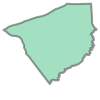

In [12]:
usa1810.geometry[0]

### Challenge

In the cell below, rename the column NHGISNAM to 'county'.

Hint from your `Intro to Pandas` notebook: 

>`unemployment.rename(columns={'month' : 'year_month'}, inplace=True)`

In [13]:
# Your code here


## Mapping with GeoPandas

Plot the `usa1810` data with the geopandas `plot` method, which uses `matplotlib` and the matplotlib `pyplot` module under the hood.

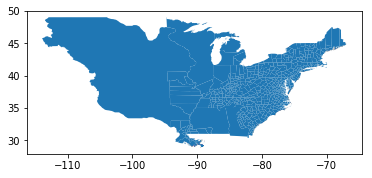

In [14]:
usa1810.plot()

Pretty cool to be able to make a map with a single command.  However, there is always room for improvement. 
You can find out more about the plotting options for basic maps in the [geopandas documentation](http://geopandas.org/mapping.html) and in the [matplotlib documentation](http://matplotlib.org/api/pyplot_api.html). 

We can use some options to make a prettier map. Take a minute to consider what each option does.



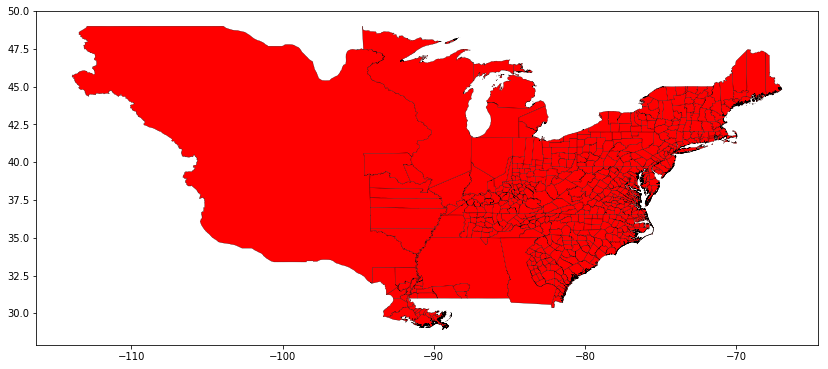

In [15]:
# make blue counties red
usa1810.plot(linewidth=0.25, edgecolor='black', facecolor='red',  figsize=(14,10))

## Challenge

Let's compare the extent of the USA in 1810 to the USA in 2017.

- Read the file `usa_outline.shp` into a geopandas dataframe named `usa`.
- Then, make a map of the `usa`, setting the `figsize` to (14,10).

In [16]:
## Your code here

# first read in the file

# then plot the gdf

### Question

Any idea why the map of the plot looks so wide?

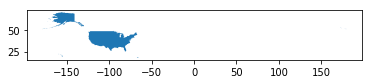

In [17]:
# Let's read in and plot the usa shapefile

usa = gpd.read_file('data/usa_outline.shp')
usa.plot()

## Overlays

A key strength of geospatial data analysis is the ability to overlay data that are located in the same coordinate space. Let's overlay the USA in 1810 on top of the USA in 2017 to visualize the change.  We will explore two methods for doing this, as shown in the [GeoPandas documentation](http://geopandas.org/mapping.html)

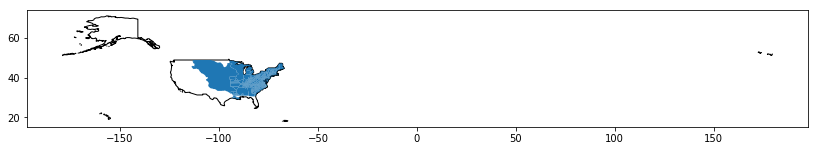

In [18]:
# Method 1. Simple geopandas plot overlay

base = usa.plot(color='white', edgecolor='black',  figsize=(14,10))
usa1810.plot(ax=base)

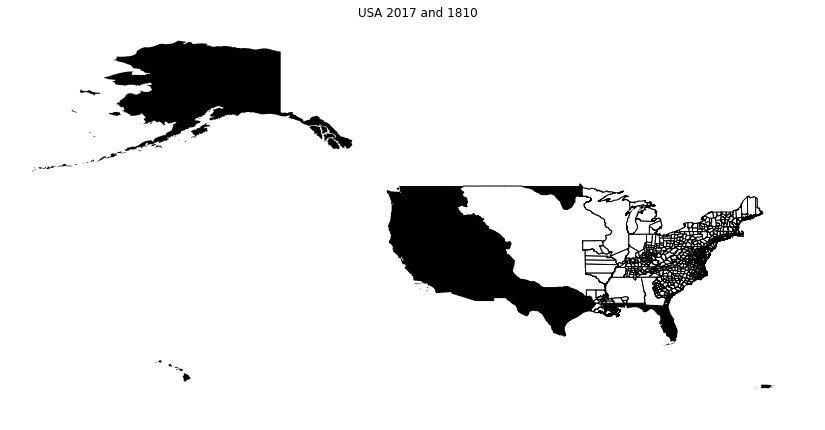

In [19]:
# Method 2. Setting Matplot lib options

fig, ax = plt.subplots(1, figsize=(14,10))  # Initialize the plot figure (drawing area) and axes (data area)
ax.set_xlim([-180, -60]) # Set the x axis limit on the axes
ax.set_aspect('equal')   # set the aspect ratio for the x and y axes to be equal. 
                         # This is done automatically in gdf.plot()
    
base = usa.plot(ax=ax, color='black')  # Set the base map, or bottom map layer
usa1810.plot(ax=base, color='white', edgecolor="black")  # draw the data with the base
_ = ax.axis('off') # Don't show the x, y axes and labels in the plot
ax.set_title("USA 2017 and 1810")  # Give the plot a title


## Questions?

If your lost, don't worry. Many folks, myself included, scratch their head and copy matplotlib code, amazed and mystified when it works. Gradually it sinks in. You can expediate the process by reviewing any of a number of good online tutorials, like this one from [DataCamp](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python).

# Coordinate Reference Systems (CRS) 

Did you notice anything funny about the shape of the USA as mapped above?  How does it differ from this?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Map_of_USA_with_state_names.svg/640px-Map_of_USA_with_state_names.svg.png" width="800px"></img>

Why does it differ? Here's why:

<img src="data/orange_peel_world.png" width="500px"></img>

When we map data encoded with a spheriodal coordinate reference system (longitude & latitude) as though it were two dimension x,y coordinate data we get distortion!

## Map Projections and CRS Transformations

In order to reduce distortion in 2D maps we transform geographic coordinates to projected map coordinates.

> This transformation is also necessary for may geometric calculations like area and distance that assume a 2D plane.

The process for CRS transformations is:

1. Make sure a `crs` is defined for the geopandas dataframe by checking the `crs` property. 
2. If it is not set, you can set it with the `crs` method.
3. Transform it using the `to_crs` method.

In [20]:
# Check the CRS of our gdfs
usa.crs
usa1810.crs

{'init': 'epsg:4326'}

What's an `epsg:4326`?  That's an [EPSG](http://www.epsg.org/) code for the geographic CRS known as the [World Geodectic System of 1984](https://en.wikipedia.org/wiki/World_Geodetic_System#WGS84), or `WGS84`. This is the most commonly used CRS for latitude and longitude coordinate data and is the default CRS for most mapping software when the data does not have a defined CRS.

We can make our map look better by transforming it to a 2D projected `CRS`. A projected CRS applies a mathematical transformation to the data based on a [map projection](https://en.wikipedia.org/wiki/Map_projection)

Common Map projections and EPSG codes for mapping USA data include:

- `Web Mercator` (epsg:3857)
- `USA Contiguious Albers` (epsg:7603)

Let's try these.

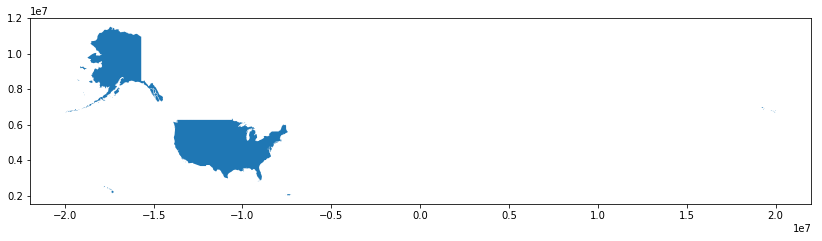

In [21]:
# Transform geographic crs to web mercator
usa_3857 = usa.to_crs(epsg=3857)
usa_3857.plot(figsize=(14,8))

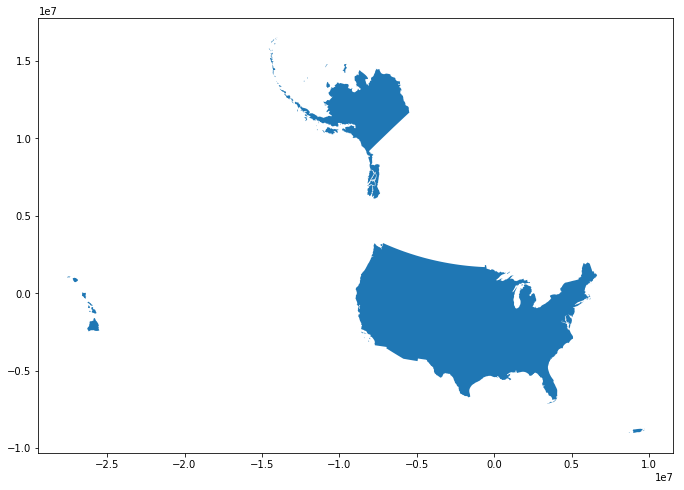

In [22]:
# Transform geographic crs to USA Contiguous Albers
usa_7603 = usa.to_crs(epsg=7603)
usa_7603.plot(figsize=(14,8))

You can see we get very different maps of the USA depending on the CRS. Web Mercator is best suited for large geographic extents between +-60 degrees (i.e. distortion increases as you move away from equator and towards the poles). USA Contiguous Albers is best for the continental USA.  We could subset the data to remove Alaska, Hawaii and Puerto Rico.

### Important Notes

1. Data need to be in the same CRS in order to be mapped or analyzed together.
2. It's not obvious what the best projected CRS is for your map or analysis. You need to review the recent literature (as these things change) and try different ones.  Here is a good starting place, [epsg.io](http://epsg.io/).


> A detailed discussion CRS and map projections is beyond the scope of this notebook. Understanding these, however, is **necessary** for working sucessfully with geospatial data! There are a number of online resources that can be found with a web search to help you get started.

# Mapping Data

By default maps show locations in space. Data maps, also called thematic maps, convey data values at specific locations by associating those values with map symbology like color, shape and size. 

In this section we will explore population data in the `Orleans Territory` from the US Census of 1810.


Since we are only interested in the `Orleans Territory` let's subset the `usa1810` data. Take another look at the geopandas dataframe to identify the column we can subset the data.

In [23]:
usa1810

,DECADE,NHGISNAM,STATENAM,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN,geometry
0,1810,Montgomery,Virginia,G5101210,5101210,2.704401e+09,2.501086e+05,POLYGON ((-80.12104214992669 37.20482174945722...
1,1810,Montgomery,Maryland,G2400310,2400310,1.311046e+09,1.742622e+05,POLYGON ((-77.16570400233252 39.30970400545093...
2,1810,Wilkinson,Georgia,G1303190,1303190,1.176078e+09,1.624714e+05,"POLYGON ((-83.1391050079994 33.00740997141834,..."
3,1810,Claiborne,Tennessee,G4700250,4700250,1.532297e+09,2.273355e+05,POLYGON ((-83.20007636797742 36.59390495157552...
4,1810,Gallatin,Kentucky,G2100770,2100770,1.099820e+09,1.882088e+05,"POLYGON ((-84.7954100072575 38.85727100829573,..."
5,1810,Humphreys,Tennessee,G4700850,4700850,4.387512e+09,4.388399e+05,POLYGON ((-87.58987883740981 36.22566217586706...
6,1810,Cumberland,Virginia,G5100490,5100490,7.762990e+08,1.485055e+05,POLYGON ((-78.11431399648382 37.72109600357045...
7,1810,Hampshire,Massachusetts,G2500150,2500150,4.925878e+09,3.597629e+05,POLYGON ((-72.27199499659609 42.67465900911975...
8,1810,Rowan,North Carolina,G3701590,3701590,3.572823e+09,2.569196e+05,POLYGON ((-80.04307798180838 36.01382101908401...
9,1810,Columbiana,Ohio,G3900290,3900290,2.204989e+09,1.901809e+05,POLYGON ((-80.51909100931373 40.92106102254341...


The `STATENAM` column includes a reference to the territory so let's use that.  Then map the result to check it.

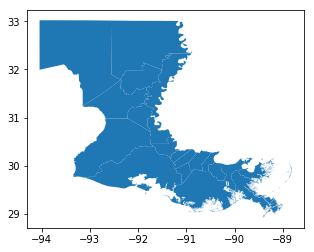

In [24]:
orleans = usa1810[usa1810['STATENAM'] == 'Orleans Territory']
orleans.plot()

Nice! Orleans Territory looks alot like the state of Louisiana.

### Attribute Joins

In order to map data we need data associated with the locations. We have polygon data in the `orleans1810` geodataframe but no attributes of interest.

In a separate file, we have 1810 population data for the Orleans Territory that was downloaded from the NHGIS. These data are in the `CSV` file `orleans_census_data1810.csv`.  We need to read the file into a `pandas` dataframe and then join the columns from that data to the `orleans` geopandas data based on a column with common data value.  This process is called an `attribute join` and is a common operation when working with geospatial data.

First, read in the population data from the 1810 census that we want to map. 

In [26]:
orleans_census1810 = pd.read_csv('data/orleans_census_data1810.csv')

In [27]:
orleans_census1810.head()  # take a look at the data

,GISJOIN,YEAR,STATE,COUNTY,total_pop,nwfree_pop,nwslave_pop,white_pop,non_whitepop
0,G4170015,1810,Orleans Territory,Ascension,2219,47,1031,1141,1078
1,G4170035,1810,Orleans Territory,Assumption,2472,10,547,1915,557
2,G4170055,1810,Orleans Territory,Attakapas,7369,278,3132,3959,3410
3,G4170075,1810,Orleans Territory,Avoyelles,1209,22,404,783,426
4,G4170095,1810,Orleans Territory,Catahoula,1164,8,348,808,356


Compare the `orleans_census1810` data with the `orleans` geopandas dataframe. What columns in these two data objects have common values on which the data frames can be joined?

In [28]:
orleans.head()


,DECADE,NHGISNAM,STATENAM,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN,geometry
16,1810,St Bernard,Orleans Territory,G4170315,4170315,1.257319e+09,2.135876e+06,(POLYGON ((-89.48624800600527 30.0784410043280...
30,1810,Pointe Coupee,Orleans Territory,G4170275,4170275,1.658593e+09,2.587041e+05,POLYGON ((-91.66485398865085 31.00487700733215...
34,1810,Concordia,Orleans Territory,G4170115,4170115,4.111629e+09,7.277508e+05,POLYGON ((-90.92344100060549 32.29776700806818...
111,1810,St Charles,Orleans Territory,G4170335,4170335,9.275758e+08,1.388439e+05,POLYGON ((-90.27940161158554 30.04869050215249...
173,1810,Ascension,Orleans Territory,G4170015,4170015,8.644760e+08,1.520748e+05,"POLYGON ((-90.88432000884806 30.3437410066223,..."


Use the geopandas `merge` command to join the two dataframes.  Then take a look at the output which we call `orleans_popdata` since it contains population data.

In [29]:
orleans_popdata = orleans.merge(orleans_census1810, on='GISJOIN')
orleans_popdata.head()

,DECADE,NHGISNAM,STATENAM,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN,geometry,YEAR,STATE,COUNTY,total_pop,nwfree_pop,nwslave_pop,white_pop,non_whitepop
0,1810,St Bernard,Orleans Territory,G4170315,4170315,1.257319e+09,2.135876e+06,(POLYGON ((-89.48624800600527 30.0784410043280...,1810,Orleans Territory,St Bernard,1020,10,382,628,392
1,1810,Pointe Coupee,Orleans Territory,G4170275,4170275,1.658593e+09,2.587041e+05,POLYGON ((-91.66485398865085 31.00487700733215...,1810,Orleans Territory,Pointe Coupee,4539,104,3187,1248,3291
2,1810,Concordia,Orleans Territory,G4170115,4170115,4.111629e+09,7.277508e+05,POLYGON ((-90.92344100060549 32.29776700806818...,1810,Orleans Territory,Concordia,2895,35,1581,1279,1616
3,1810,St Charles,Orleans Territory,G4170335,4170335,9.275758e+08,1.388439e+05,POLYGON ((-90.27940161158554 30.04869050215249...,1810,Orleans Territory,St Charles,3291,150,2321,820,2471
4,1810,Ascension,Orleans Territory,G4170015,4170015,8.644760e+08,1.520748e+05,"POLYGON ((-90.88432000884806 30.3437410066223,...",1810,Orleans Territory,Ascension,2219,47,1031,1141,1078


We can add options to the `plot` command to map the data values to the map symbology. Consider how this is done below with the data in the `nwslave_pop` (non-white slave population) column.

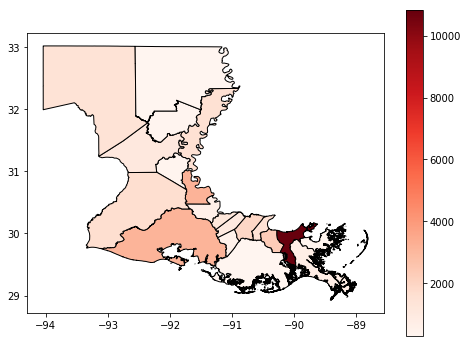

In [30]:
orleans_popdata.plot(column='nwslave_pop', cmap='Reds', edgecolor='black', legend=True, figsize=(8,6))

Above, the parameter `cmap` stands for colormap. You can see the list of available [color maps here](https://matplotlib.org/users/colormaps.html). The full range of values in the `nwslave_pop` column is being scaled to the color palette called `Reds`.  This is called an `unclassified` or `classless` map. This map is a good first effort as it imposses no grouping on the data, thus making it easier to spot trends and outliers. But it is harder to interpret the data values within an area.

A more common practice is to use a classification scheme to bin the data into classes and map those classes to a color palette. Let's try that below with `quantile` classification which is the most commonly used scheme when mapping data.

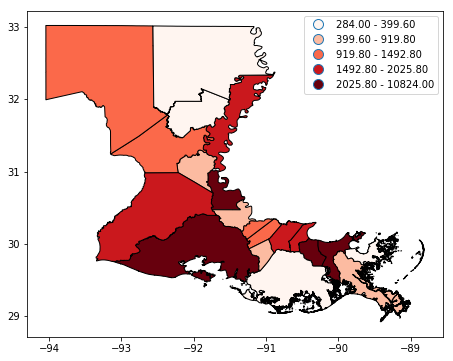

In [31]:
orleans_popdata.plot(column='nwslave_pop', cmap='Reds', edgecolor='black', 
                     legend=True, figsize=(8,6), scheme='quantiles')

Wow that gives a very different looking map!

## Challenge

In the code cell below recreate the above map with the classification schemes 'equal_interval' and 'fisher_jenks' to see how the look of the map changes.

> Bonus challenge: try a different colormap.

In [32]:
# Your code here

## Choropleth maps

>The maps we just made are called `choropleth maps`. A [choropleth maps](https://en.wikipedia.org/wiki/Choropleth_map) is a data map that colors areas, here polygons, by data values.  This are the most common type of data map. It is often also called a `heatmap`.

We can get fancy with our choropleth maps...

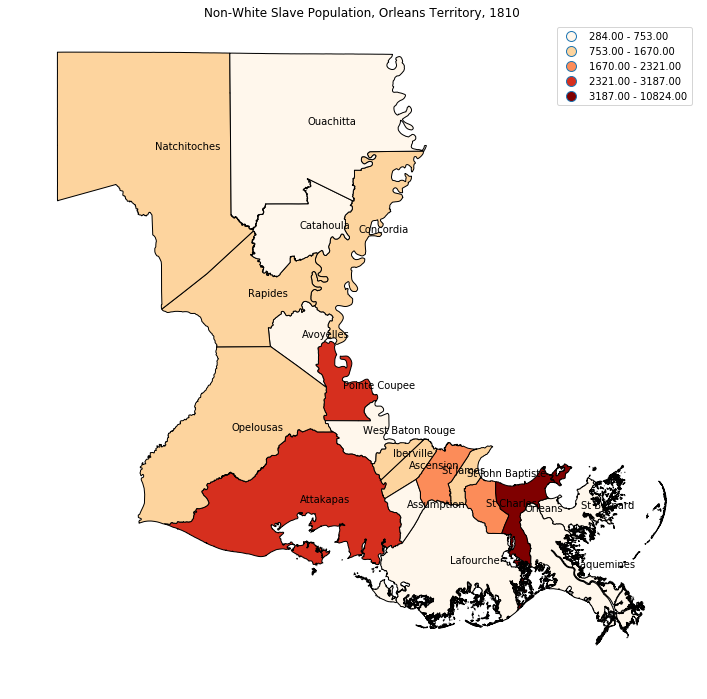

In [33]:
fig, ax = plt.subplots(1, figsize=(12,12))

orleans_popdata.plot(ax=ax, column='nwslave_pop', cmap='OrRd', edgecolor='black', legend=True, scheme='fisher_jenks')

for polygon, name in zip(orleans_popdata.geometry, orleans_popdata.COUNTY):
    ax.annotate(xy=(polygon.centroid.x, polygon.centroid.y), s=name)

_ = ax.axis('off')

ax.set_title("Non-White Slave Population, Orleans Territory, 1810")

Needless to say, labels are a bit tricky, regardless of the software you use to make a map!


## Challenge

In the cell below:

1. Add a column to `orleans_popdata` called `nwslave_white` that is the ratio of non-white slaves (nwslave_pop) to the white population (white_pop)
2. Create a choropleth map of the data values in your new column using 'fisher-jenks' classification.


## Follow-up Challenge

In 1791 and 1795 two slave revolts where planned, both in the same parish in Orleans Territory. Both plots were discovered and thwarted, leading to the trial and execution or emprisonment of many slaves. Soon thereafter, the German Coast Uprising of 1811 occured in a different Orleans parish. Can you use the map above to guess the two parishes in which these events occured? You can confirm your guess with a web search. 

# Mapping Points

Mapping data to polygons is commonly done, but sometimes point maps are preferred. Why? Because when polygons vary greatly in size, as the US states and counties do, the size of the areas can distract from interpretting the data. Large areas pop out and small ones hide in the map.

GeoPandas makes it easy to transform polygon data to point data.

In [34]:
# Convert Polys to Points and map
orleans_census_points = orleans_popdata

In [35]:
# copy poly to new GeoDataFrame
orleans_popdata_pts = orleans_popdata.copy()

# transform the geometry
orleans_popdata_pts.geometry = orleans_popdata_pts['geometry'].centroid

# take a look
orleans_popdata_pts.head()

,DECADE,NHGISNAM,STATENAM,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN,geometry,YEAR,STATE,COUNTY,total_pop,nwfree_pop,nwslave_pop,white_pop,non_whitepop
0,1810,St Bernard,Orleans Territory,G4170315,4170315,1.257319e+09,2.135876e+06,POINT (-89.54776223157208 29.86510393265154),1810,Orleans Territory,St Bernard,1020,10,382,628,392
1,1810,Pointe Coupee,Orleans Territory,G4170275,4170275,1.658593e+09,2.587041e+05,POINT (-91.59435158774605 30.693187460137),1810,Orleans Territory,Pointe Coupee,4539,104,3187,1248,3291
2,1810,Concordia,Orleans Territory,G4170115,4170115,4.111629e+09,7.277508e+05,POINT (-91.45887343055027 31.77555312592087),1810,Orleans Territory,Concordia,2895,35,1581,1279,1616
3,1810,St Charles,Orleans Territory,G4170335,4170335,9.275758e+08,1.388439e+05,POINT (-90.3630468212058 29.88361539392933),1810,Orleans Territory,St Charles,3291,150,2321,820,2471
4,1810,Ascension,Orleans Territory,G4170015,4170015,8.644760e+08,1.520748e+05,POINT (-91.02817129949055 30.14113670661508),1810,Orleans Territory,Ascension,2219,47,1031,1141,1078


That was relatively easy! Take a look at the format of the data in the `geometry` column and note how it differs for that of `orleans_popdata`.

Make a quick plot of the data to make sure it looks right.

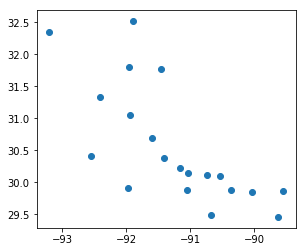

In [36]:
orleans_popdata_pts.plot()

To get geographic context, we can plot those points on top of the polygons. Consider the code below for doing this and the resultant plot.

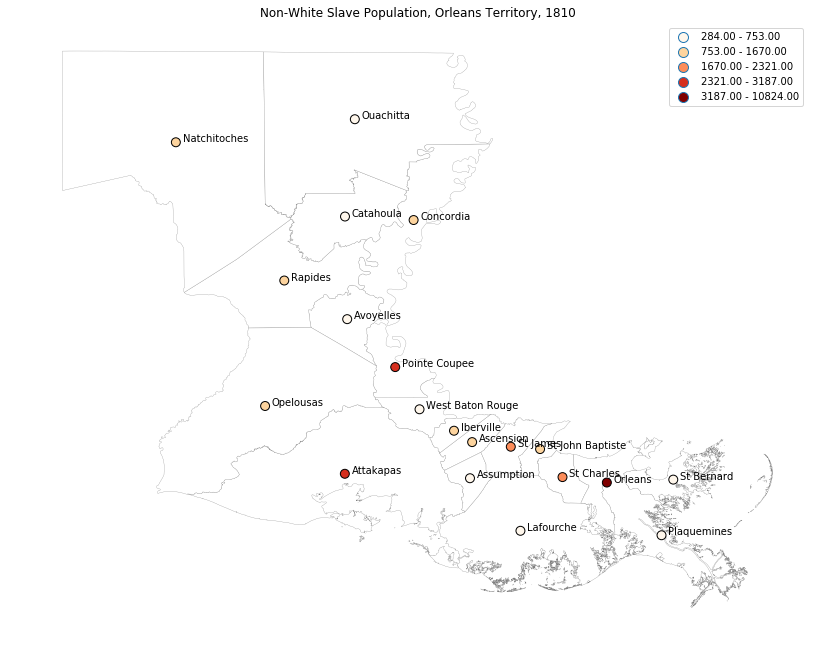

In [37]:
fig, ax = plt.subplots(1, figsize=(14,14))  # Initialize the plot figure (drawing area) and axes (data area)
 
ax.set_aspect('equal')   # set the aspect ratio for the x and y axes to be equal. 
                         # This is done automatically in gdf.plot()
    
base = orleans_popdata.plot(ax=ax, facecolor='white', edgecolor='grey', linewidth=0.25,)   
orleans_popdata_pts.plot(ax=base, column='nwslave_pop', cmap='OrRd', edgecolor='black', markersize=80,
                            legend=True, scheme='fisher_jenks')
_ = ax.axis('off')  

for polygon, name in zip(orleans_popdata.geometry, orleans_popdata.COUNTY):
    ax.annotate(xy=(polygon.centroid.x+0.05, polygon.centroid.y), s=name, color='black')
    
ax.set_title("Non-White Slave Population, Orleans Territory, 1810")

## Challenge

Redo the map above with the data in the column `nwslave_white` (or the ratio of non-white slaves to whites.)

In [38]:
# Your Code Here

# Summary
We have just touched the tip of the iceberg here in terms of mapping, manipulating and analyzing geospatial data. I hope this encourages you to check out the GeoPandas in more detail and to continue working with geospatial data in Python or in another software tool. Happy mapping!

---

Created by: Patty Frontiera, on 6/5/2018
    
Acknowledgements: This notebook borrows from that of Prof. David O'Sullivan's notebooks for [Geography-88](https://github.com/data-8/geography-88).